# Brandon Inscoe

## Unit 03 project: spring pendulum


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from vpython import * 
from matplotlib.patches import Circle
import imageio as im
from IPython.display import Image

In this project, I will investigate the motion of a spring pendulum, where the spring is the rod of the pendulum. This will explore not only the oscillations of a spring with a mass attached to a spring, but also with the added oscillations of a pendulum. The spring is an example of N-coupled oscillators being stretched and returned to rest positions. I also included comments in the code to help explain what each chunk of code does. For the model, I used imageio in order to create a gif animation, rather than doing a vpython animation. I like how this turned out compared to the vpython version of the model.

In [18]:
# Pendulum equilibrium spring length (m), spring constant (N.m)
L0, k = 1, 40
m = 1
# The gravitational acceleration (m.s-2).
g = 9.81

In [19]:
def deriv(y, t, L0, k, m):
    #Return the first derivatives of y = theta, z1, L, z2.
    theta, z1, L, z2 = y

    thetadot = z1
    z1dot = (-g*np.sin(theta) - 2*z1*z2) / L
    Ldot = z2
    z2dot = (m*L*z1**2 - k*(L-L0) + m*g*np.cos(theta)) / m
    return thetadot, z1dot, Ldot, z2dot

In [20]:
# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 20, 0.01
t = np.arange(0, tmax+dt, dt)
# Initial conditions: theta, dtheta/dt, L, dL/dt
y0 = [3*np.pi/4, 0, L0, 0]

# Do the numerical integration of the equations of motion,
#I used the "odeint" function from scipy which was easier (to me) than the ode solver methods by Wang.
y = odeint(deriv, y0, t, args=(L0, k, m))
# Unpack z and theta as a function of time
theta, L = y[:,0], y[:,2]

# Convert to Cartesian coordinates of the two bob positions.
x = L * np.sin(theta)
y = -L * np.cos(theta)

# Plotted bob circle radius
r = 0.05
# Plot a trail of the m2 bob's position for the last trail_secs seconds.
trail_secs = 1
# This corresponds to max_trail time points.
max_trail = int(trail_secs / dt)

In [21]:
def plot_spring(x, y, theta, L,ax):
    #Plot the spring from (0,0) to (x,y) as the projection of a helix.
    # Spring turn radius, number of turns
    rs, ns = 0.05, 25
    # Number of data points for the helix
    Ns = 1000
    # We don't draw coils all the way to the end of the pendulum:
    # pad a bit from the anchor and from the bob by these number of points
    ipad1, ipad2 = 100, 150
    w = np.linspace(0, L, Ns)
    # Set up the helix along the x-axis ...
    xp = np.zeros(Ns)
    xp[ipad1:-ipad2] = rs * np.sin(2*np.pi * ns * w[ipad1:-ipad2] / L)
    # ... then rotate it to align with the pendulum and plot.
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    xs, ys = - R @ np.vstack((xp, w))
    ax.plot(xs, ys, c='k', lw=2)

In [22]:
def make_plot(i):
    
    #Plot and save an image of the spring pendulum configuration for time point i.

    fig = plt.figure(figsize=(8.33333333, 6.25), dpi=72)
    ax = fig.add_subplot(111)


    plot_spring(x[i], y[i], theta[i], L[i],ax)
    # Circles representing the anchor point of rod 1 and the bobs
    c0 = Circle((0, 0), r/2, fc='k', zorder=10)
    c1 = Circle((x[i], y[i]), r, fc='r', ec='r', zorder=10)
    ax.add_patch(c0)
    ax.add_patch(c1)

    # The trail will be divided into ns segments and plotted as a fading line.
    ns = 20
    s = max_trail // ns

    for j in range(ns):
        imin = i - (ns-j)*s
        if imin < 0:
            continue
        imax = imin + s + 1
        # The fading looks better if we square the fractional length along the
        # trail.
        alpha = (j/ns)**2
        ax.plot(x[imin:imax], y[imin:imax], c='r', solid_capstyle='butt',
                lw=2, alpha=alpha)

    # Center the image on the fixed anchor point, and ensure the axes are equal
    ax.set_xlim(-np.max(L)-r, np.max(L)+r)
    ax.set_ylim(-np.max(L)-r, np.max(L)+r)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    # Clear the Axes ready for the next image.
    plt.savefig('frames.png')
    images.append(im.imread('frames.png'))
    im.mimsave('movie.mp4',images)
    
    plt.show()
    plt.close()


0 / 200


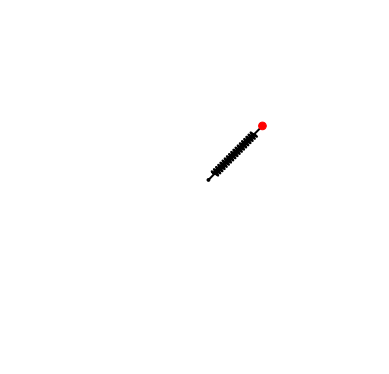

1 / 200


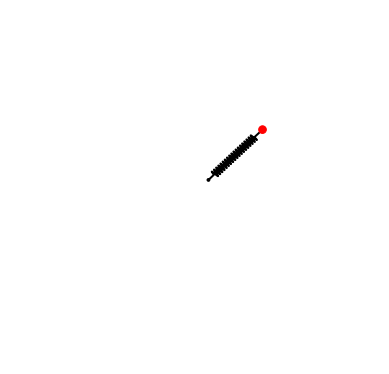

2 / 200


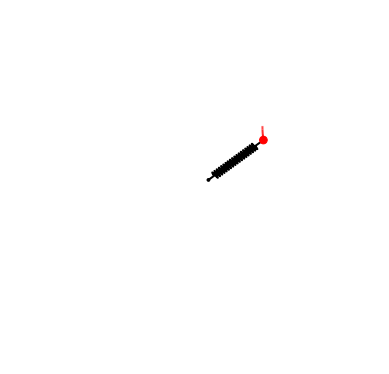

3 / 200


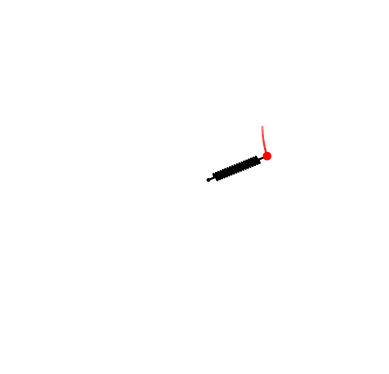

4 / 200


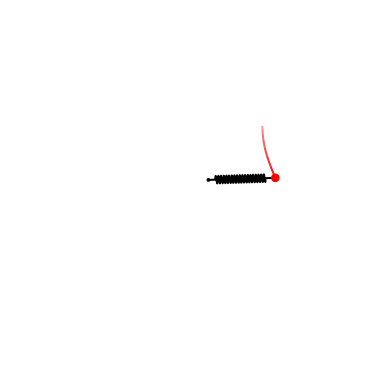

5 / 200


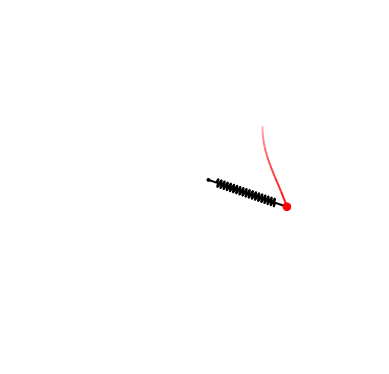

6 / 200


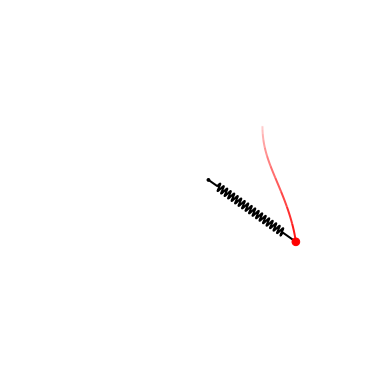

7 / 200


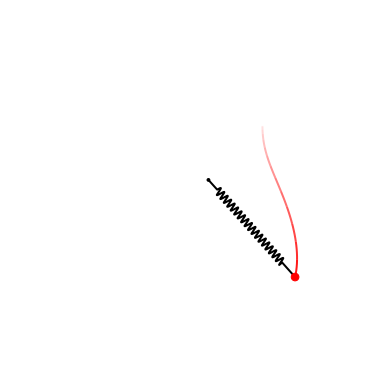

8 / 200


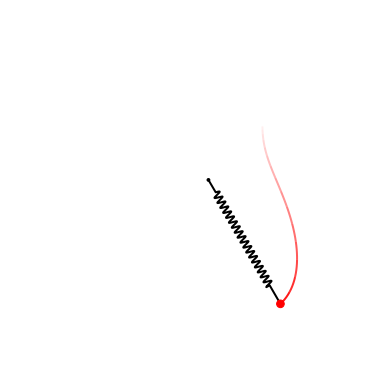

9 / 200


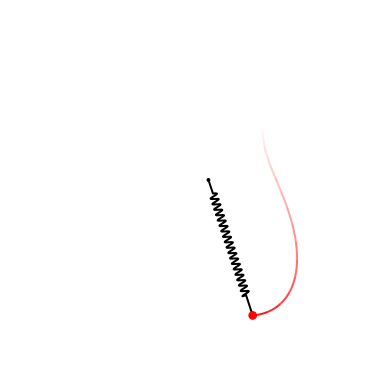

10 / 200


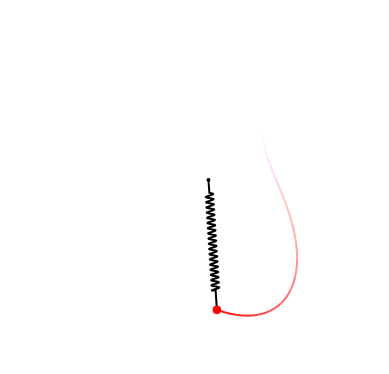

11 / 200


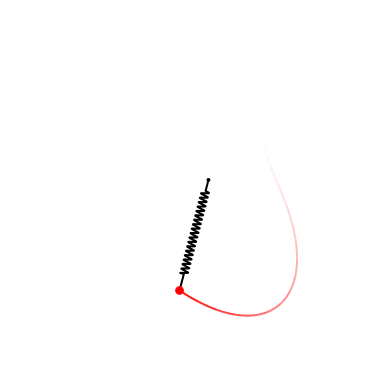

12 / 200


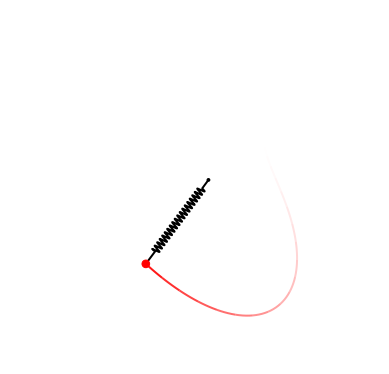

13 / 200


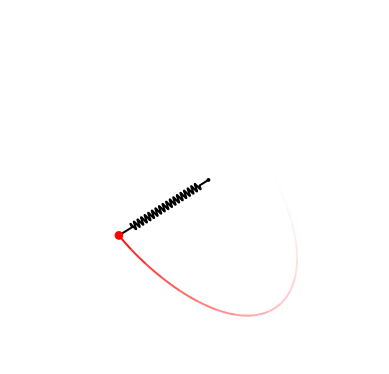

14 / 200


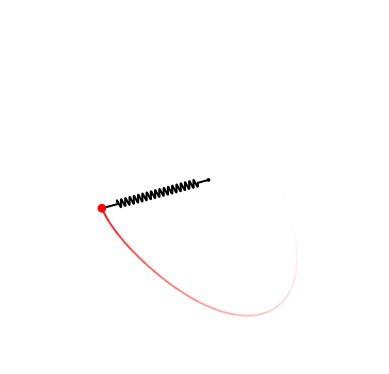

15 / 200


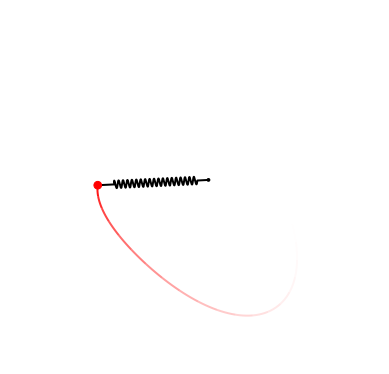

16 / 200


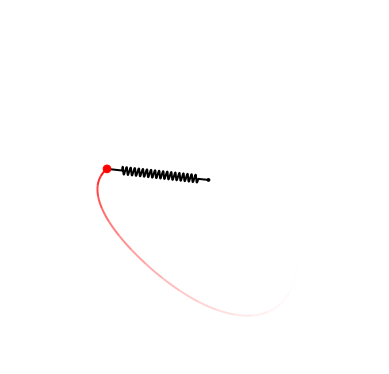

17 / 200


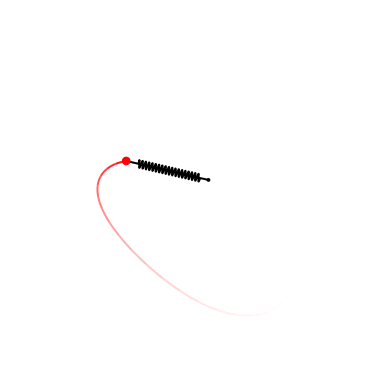

18 / 200


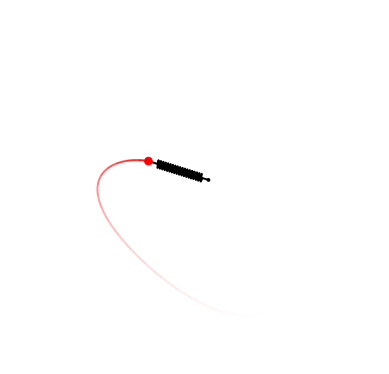

19 / 200


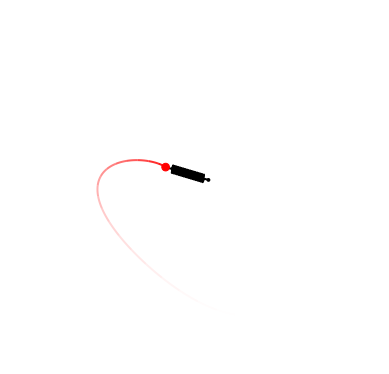

20 / 200


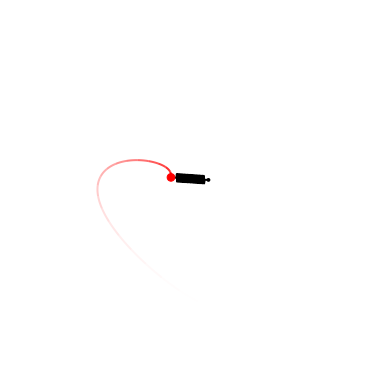

21 / 200


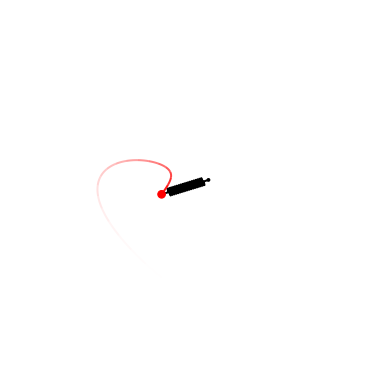

22 / 200


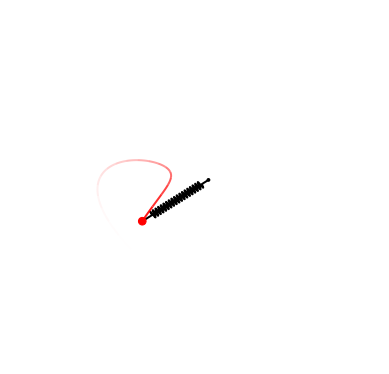

23 / 200


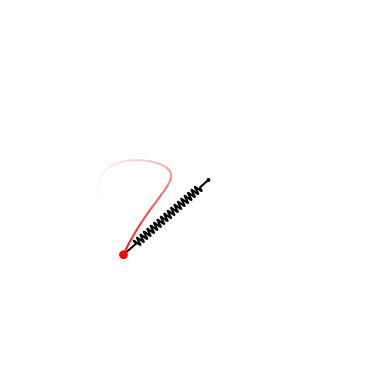

24 / 200


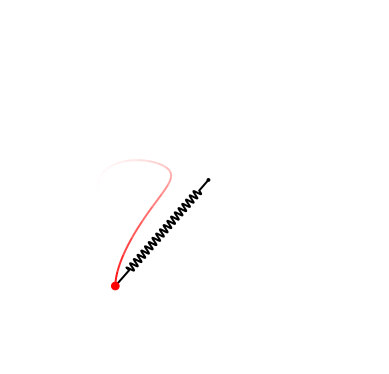

25 / 200


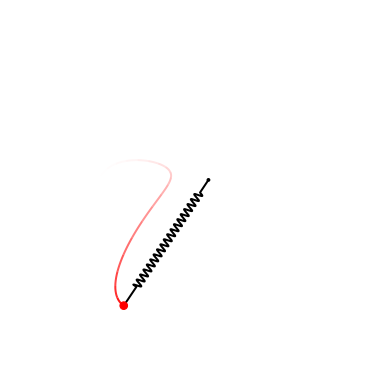

26 / 200


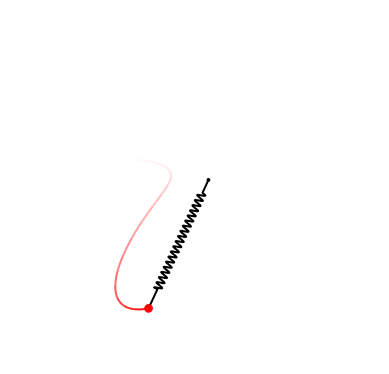

27 / 200


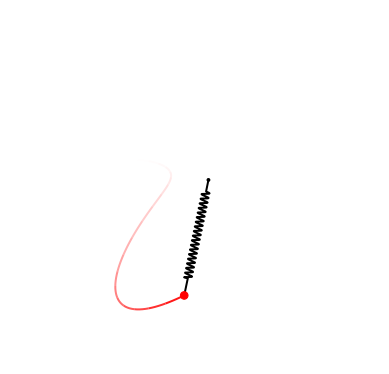

28 / 200


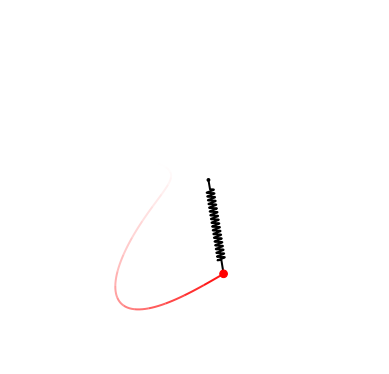

29 / 200


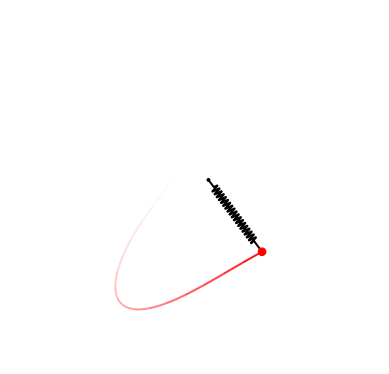

30 / 200


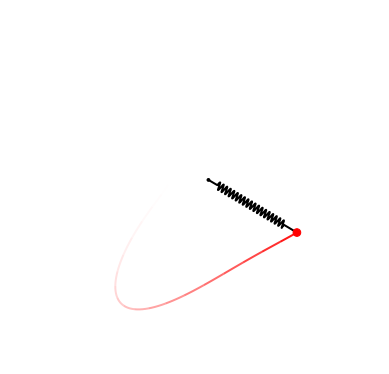

31 / 200


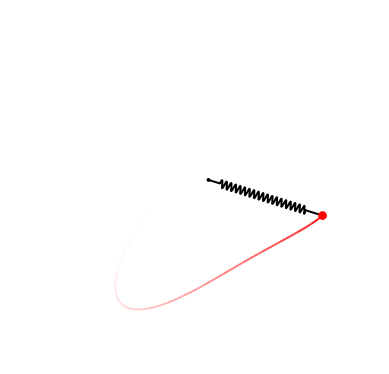

32 / 200


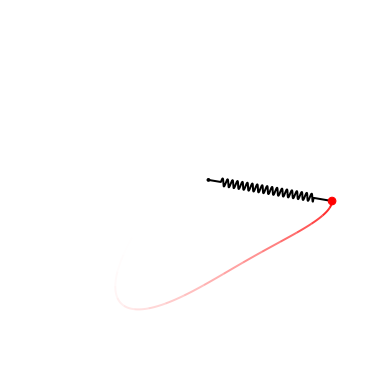

33 / 200


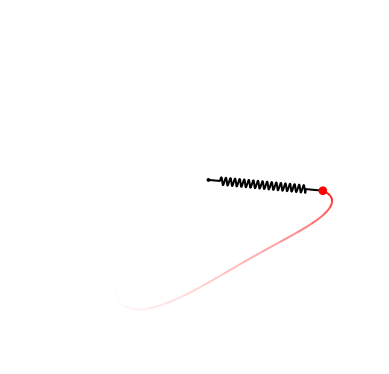

34 / 200


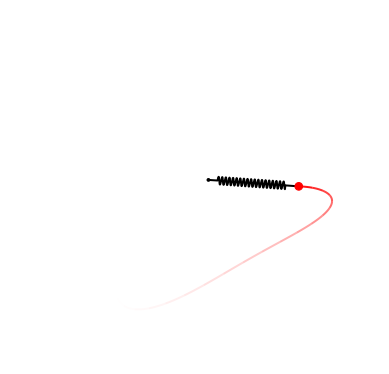

35 / 200


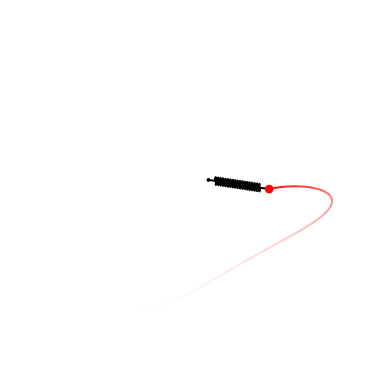

36 / 200


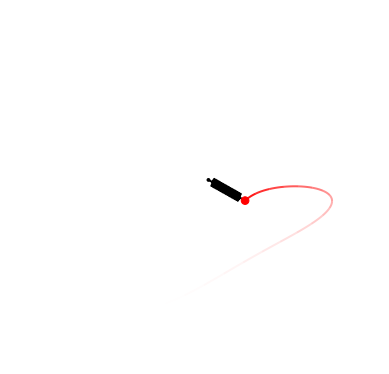

37 / 200


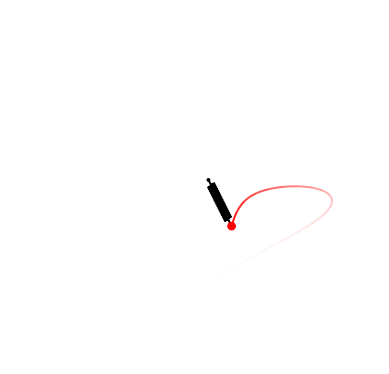

38 / 200


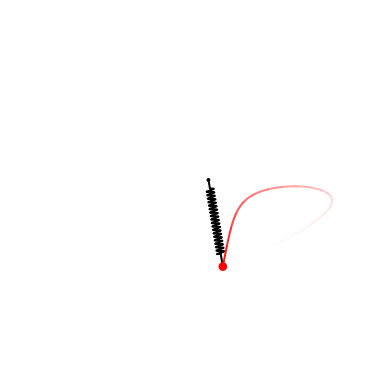

39 / 200


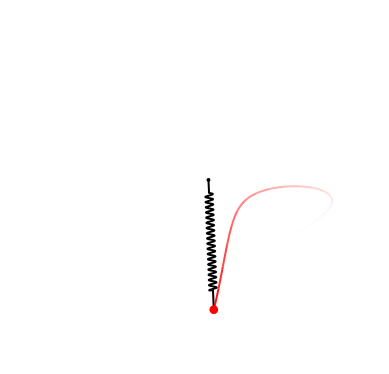

40 / 200


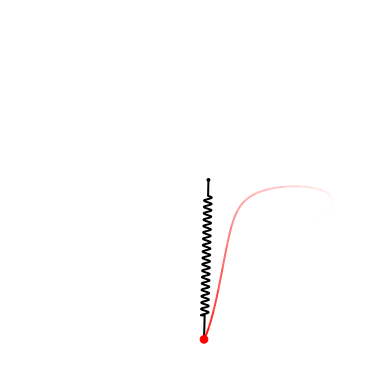

41 / 200


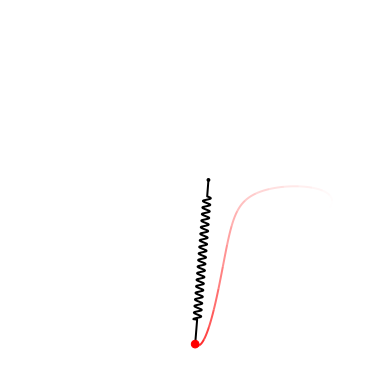

42 / 200


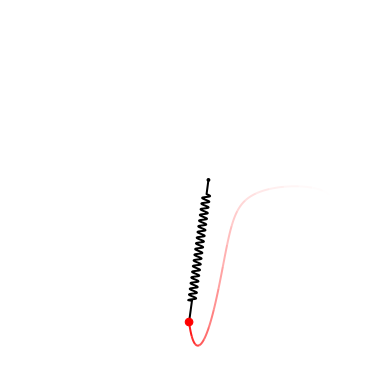

43 / 200


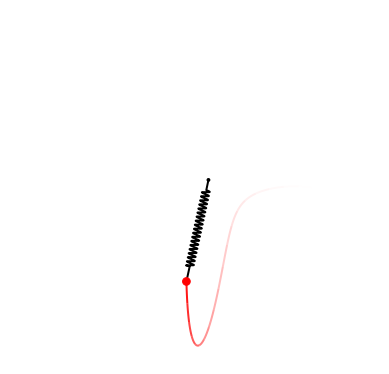

44 / 200


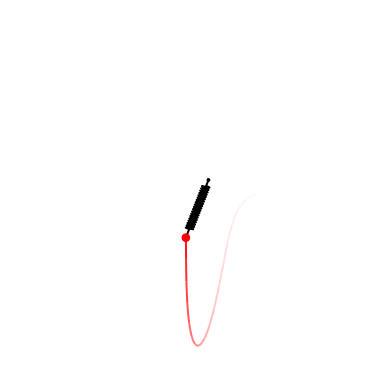

45 / 200


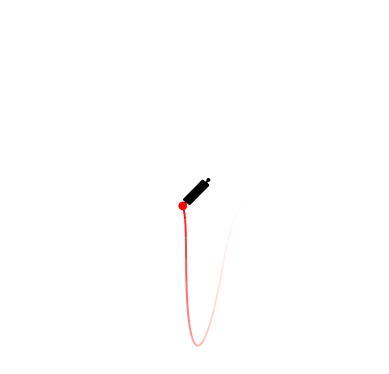

46 / 200


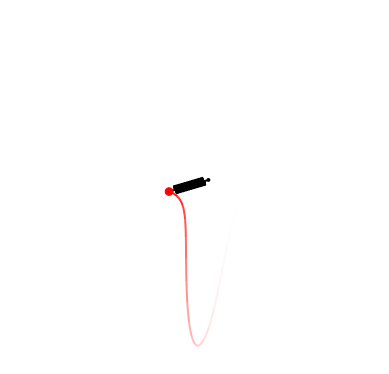

47 / 200


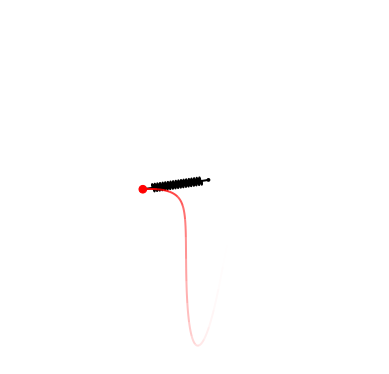

48 / 200


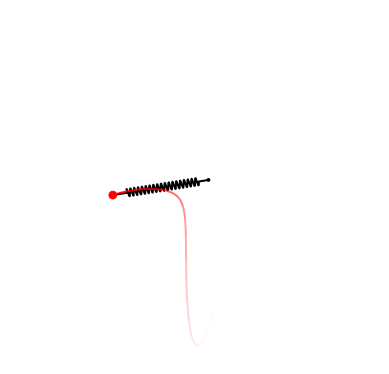

49 / 200


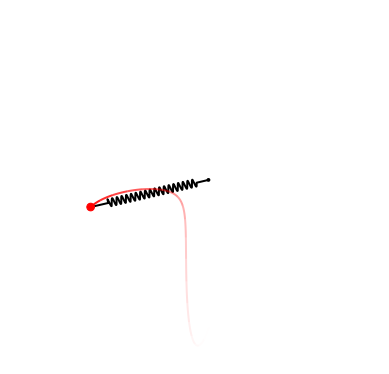

50 / 200


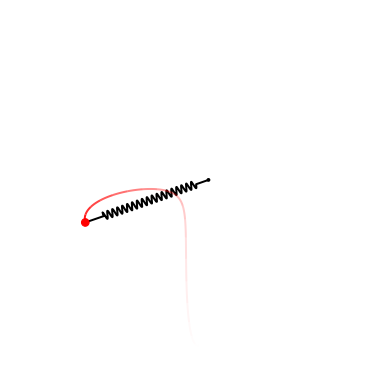

51 / 200


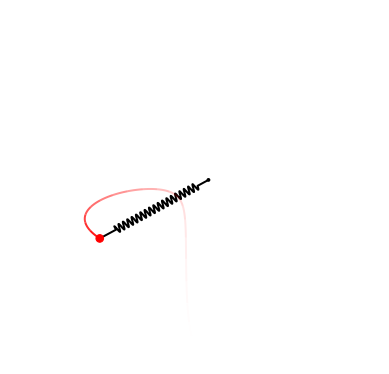

52 / 200


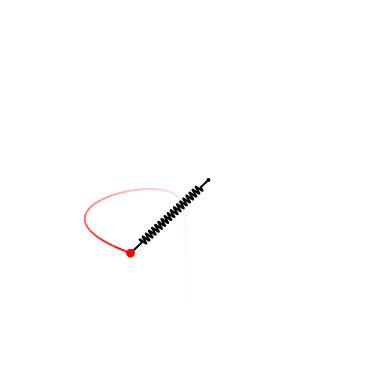

53 / 200


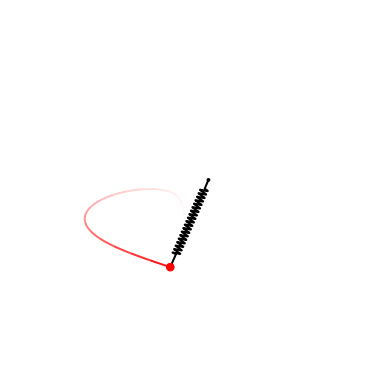

54 / 200


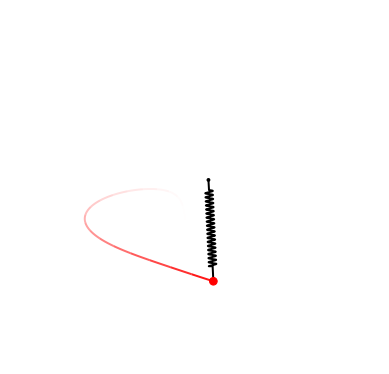

55 / 200


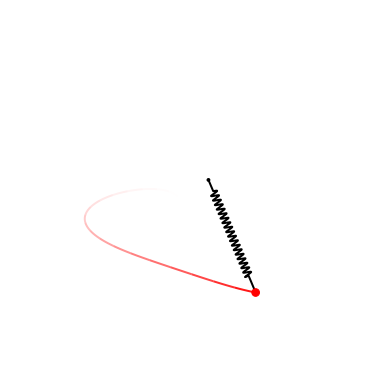

56 / 200


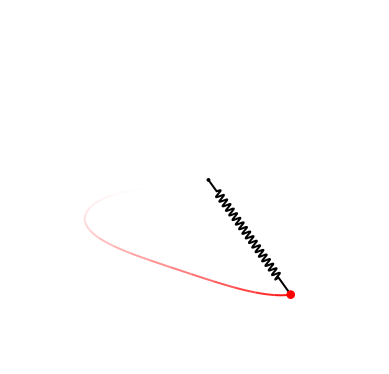

57 / 200


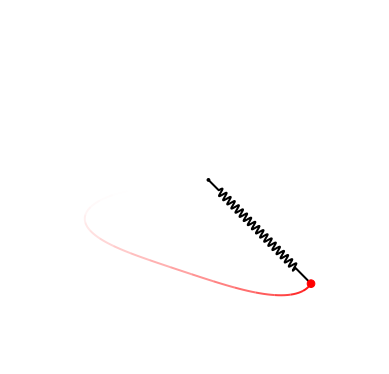

58 / 200


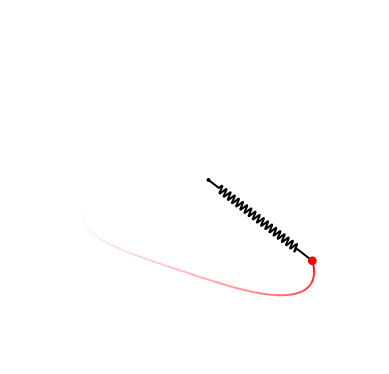

59 / 200


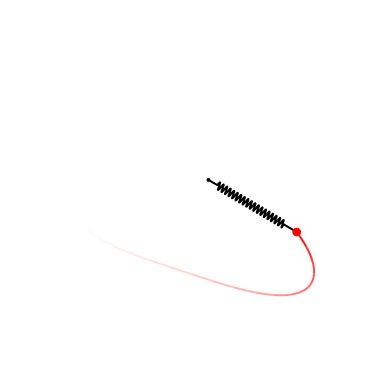

60 / 200


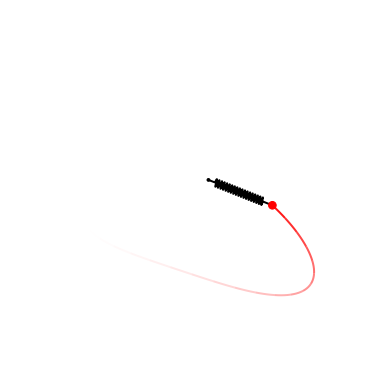

61 / 200


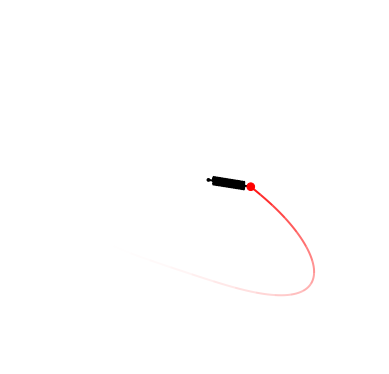

62 / 200


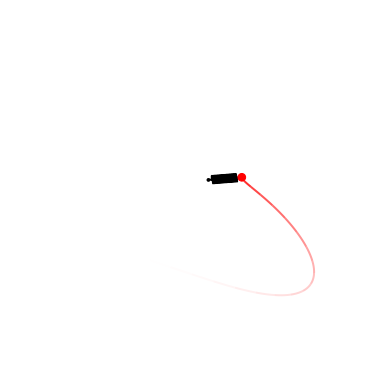

63 / 200


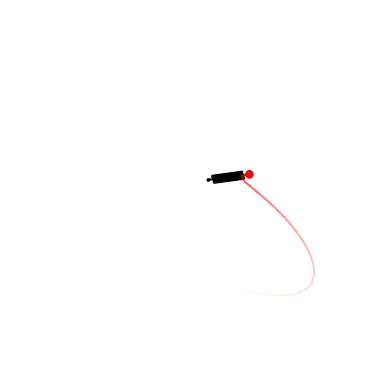

64 / 200


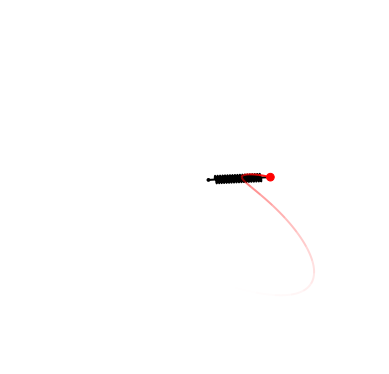

65 / 200


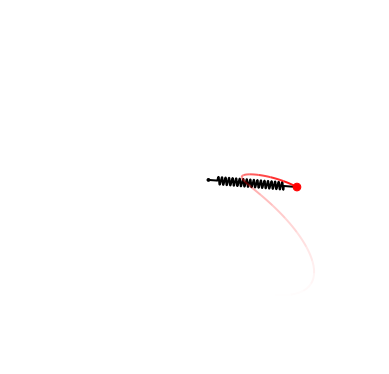

66 / 200


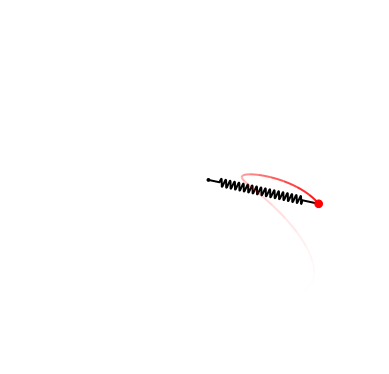

67 / 200


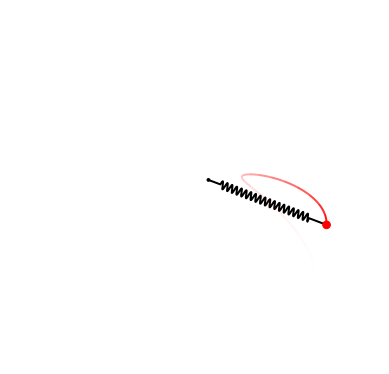

68 / 200


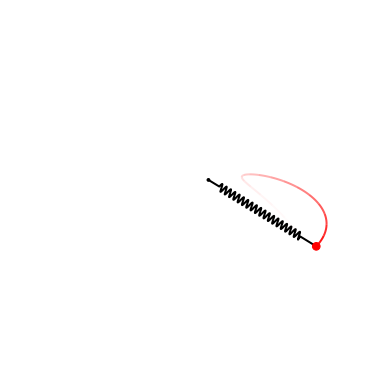

69 / 200


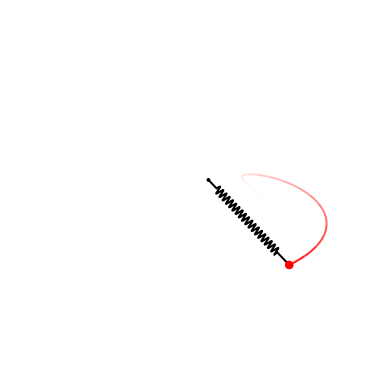

70 / 200


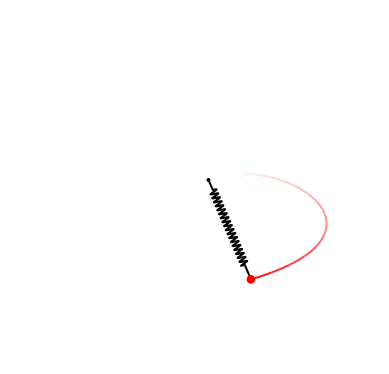

71 / 200


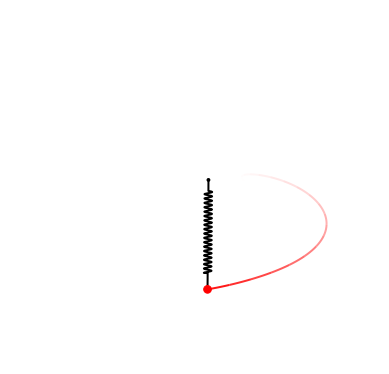

72 / 200


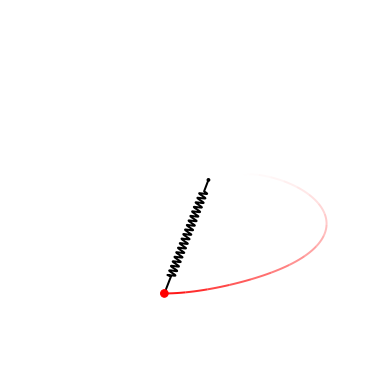

73 / 200


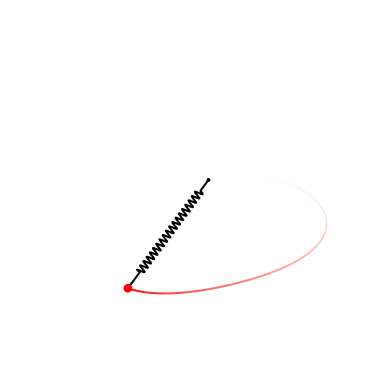

74 / 200


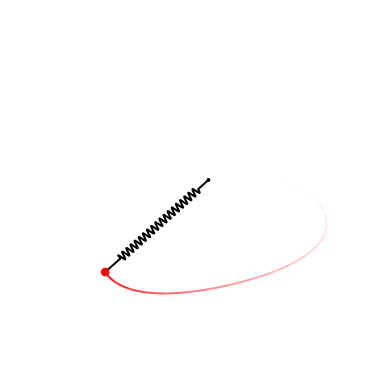

75 / 200


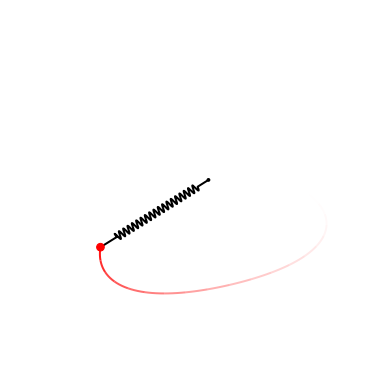

76 / 200


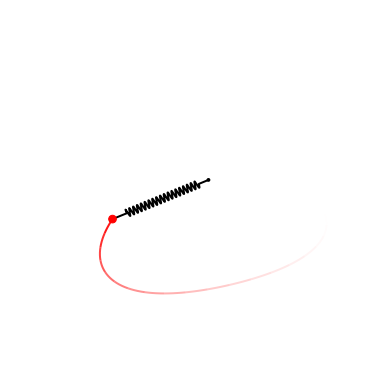

77 / 200


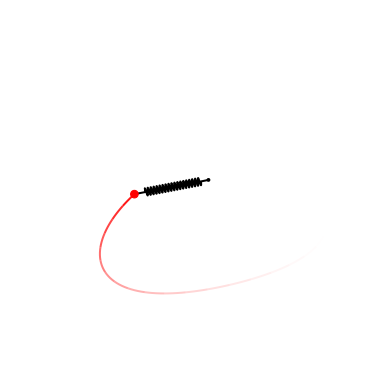

78 / 200


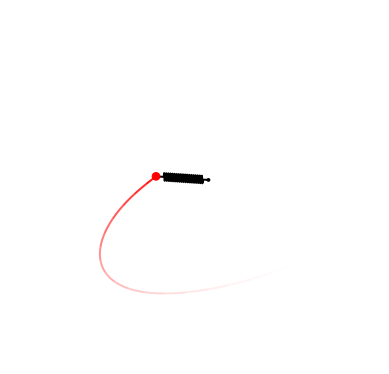

79 / 200


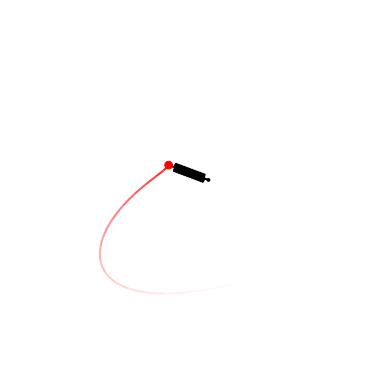

80 / 200


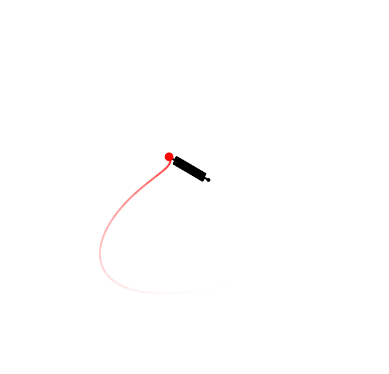

81 / 200


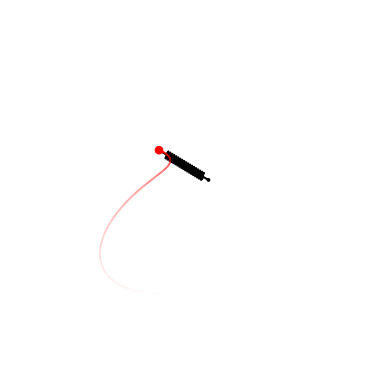

82 / 200


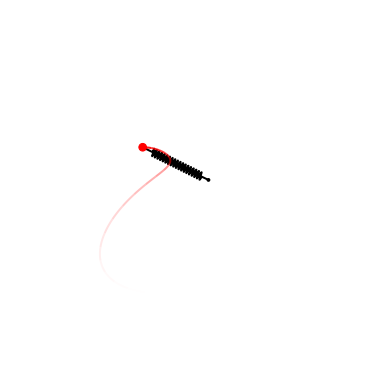

83 / 200


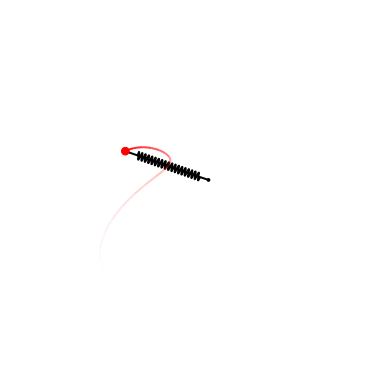

84 / 200


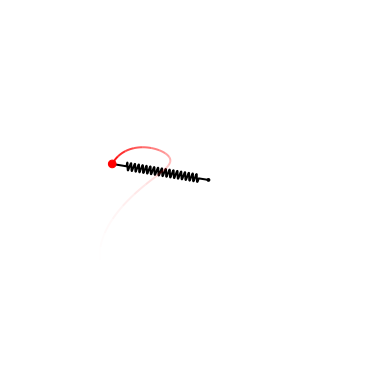

85 / 200


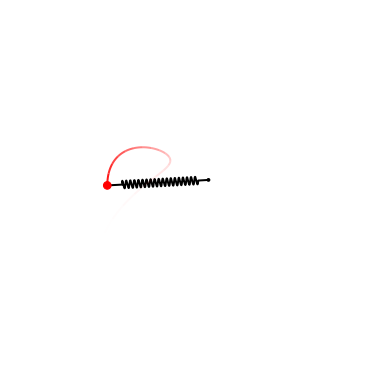

86 / 200


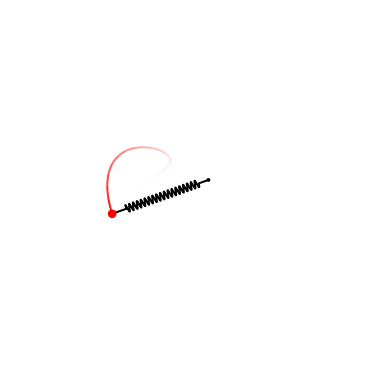

87 / 200


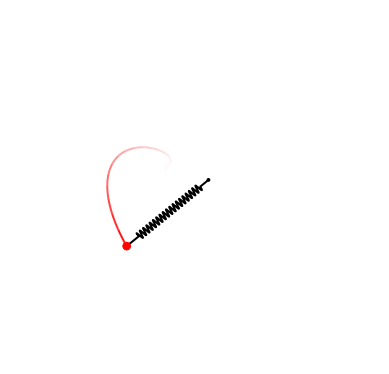

88 / 200


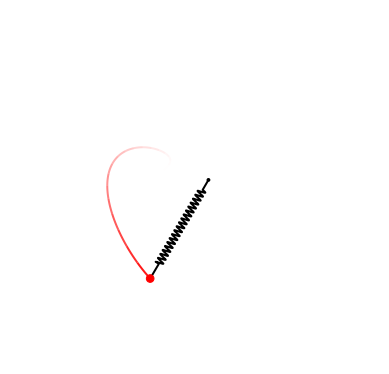

89 / 200


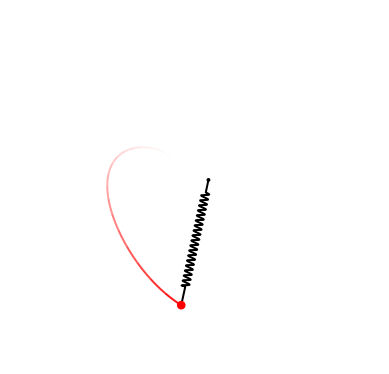

90 / 200


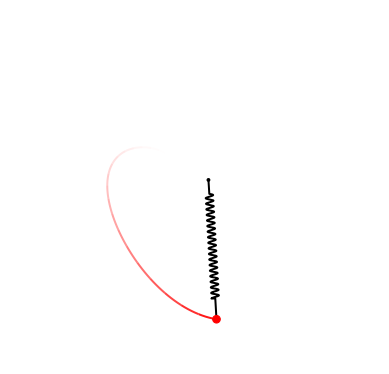

91 / 200


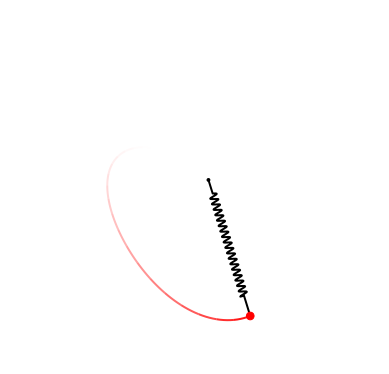

92 / 200


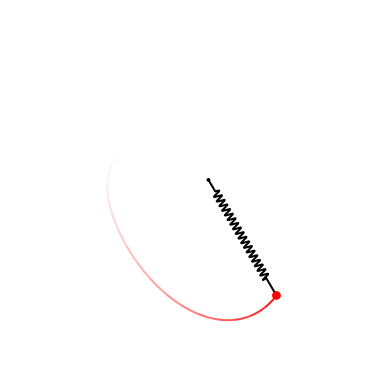

93 / 200


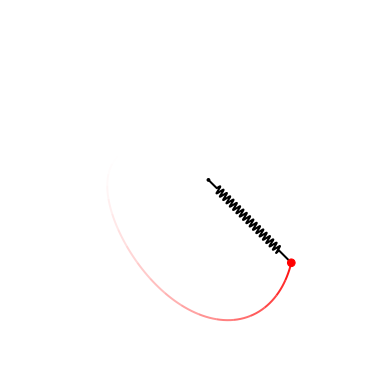

94 / 200


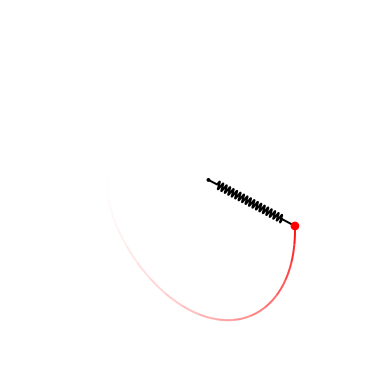

95 / 200


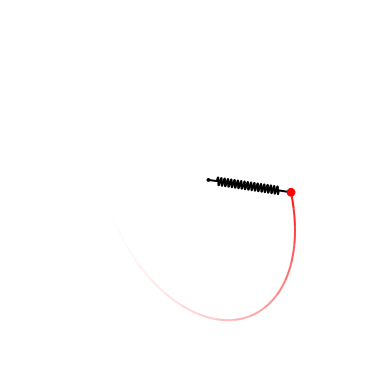

96 / 200


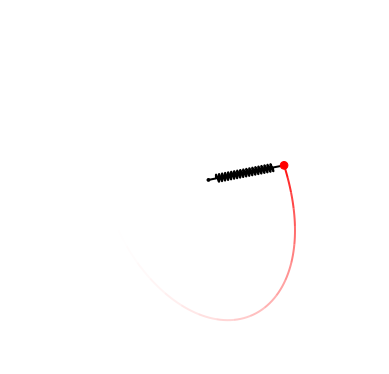

97 / 200


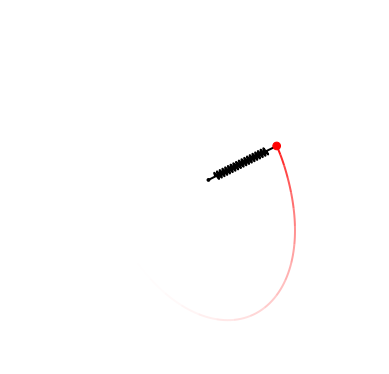

98 / 200


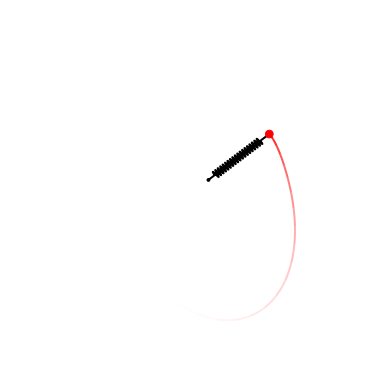

99 / 200


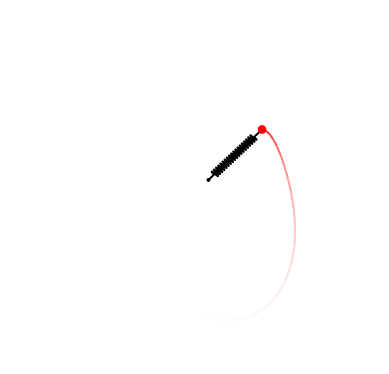

100 / 200


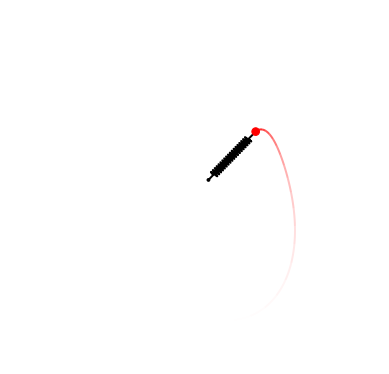

101 / 200


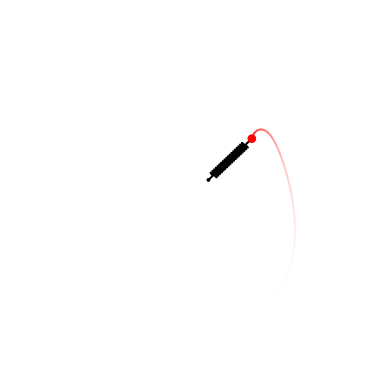

102 / 200


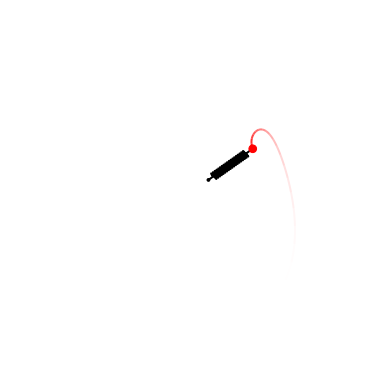

103 / 200


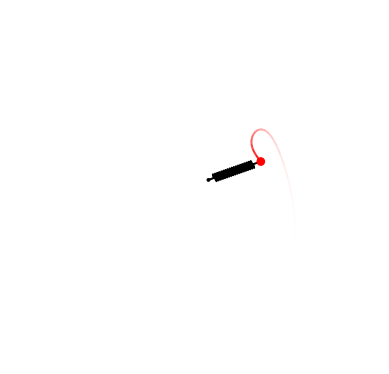

104 / 200


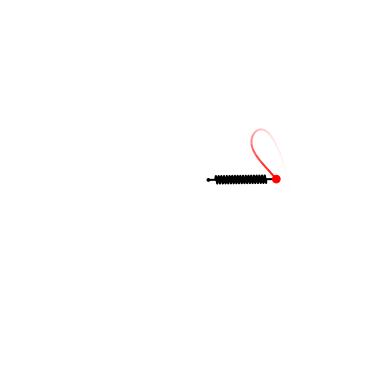

105 / 200


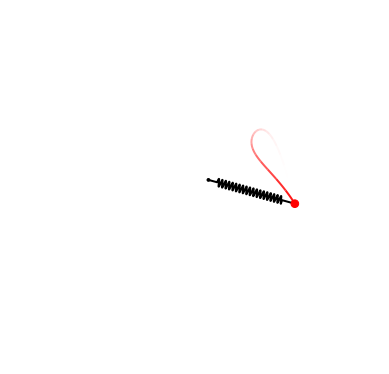

106 / 200


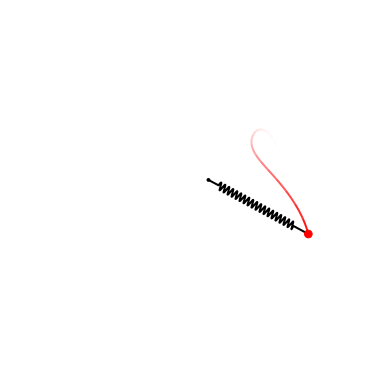

107 / 200


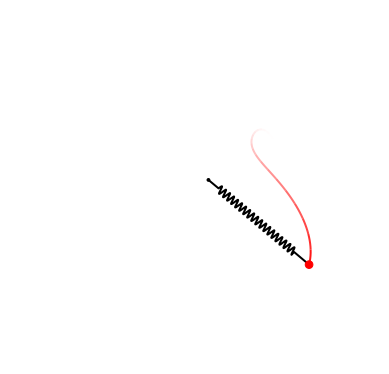

108 / 200


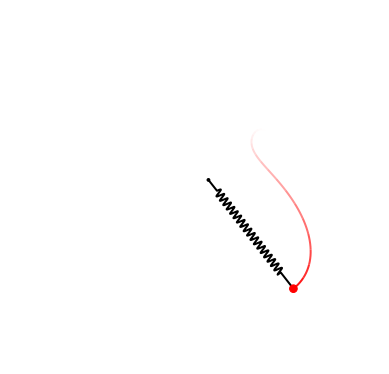

109 / 200


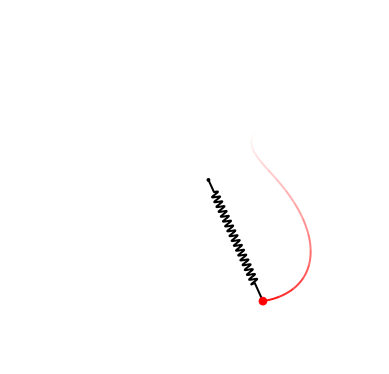

110 / 200


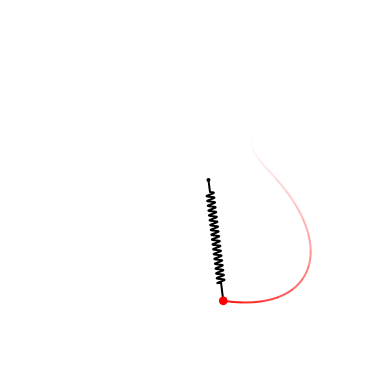

111 / 200


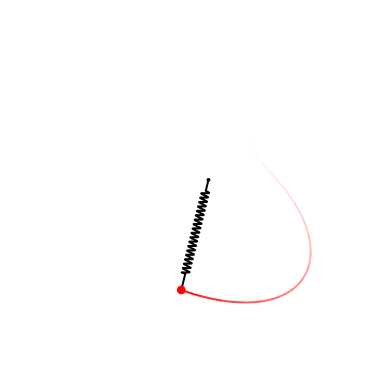

112 / 200


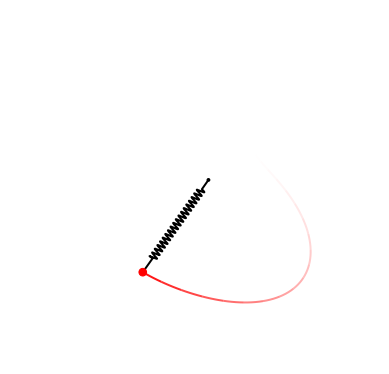

113 / 200


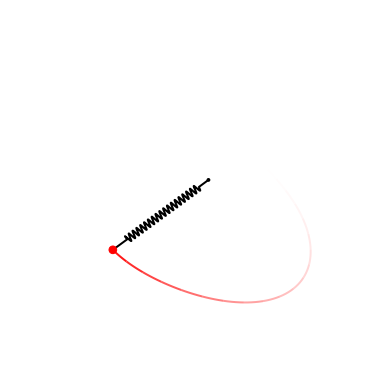

114 / 200


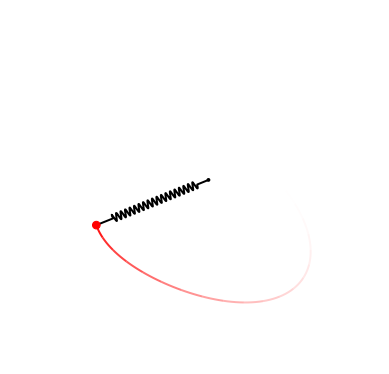

115 / 200


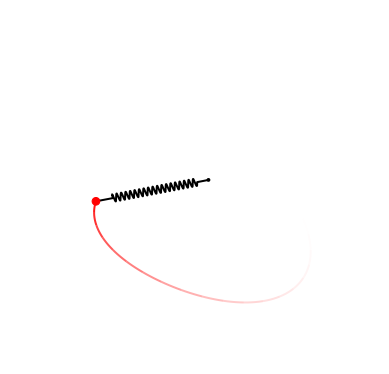

116 / 200


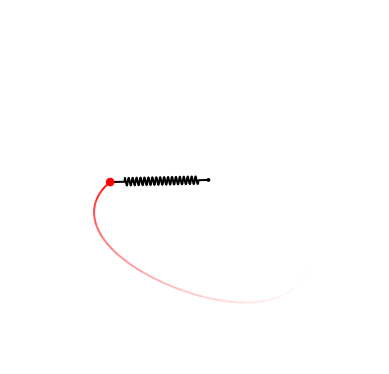

117 / 200


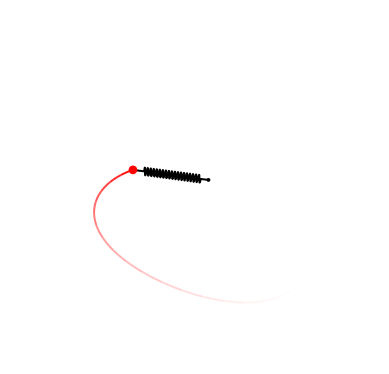

118 / 200


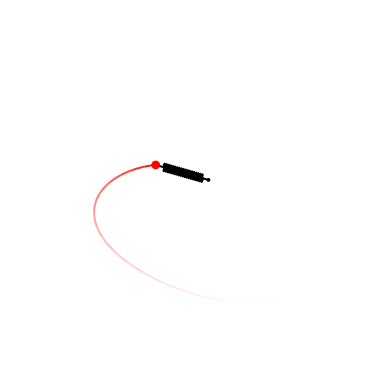

119 / 200


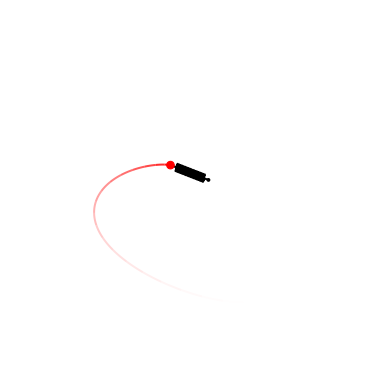

120 / 200


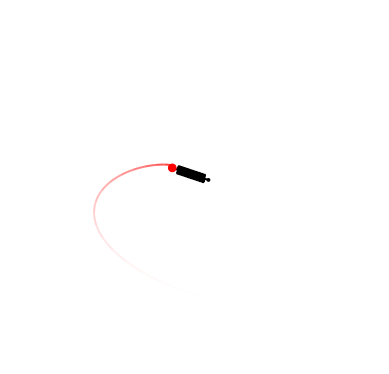

121 / 200


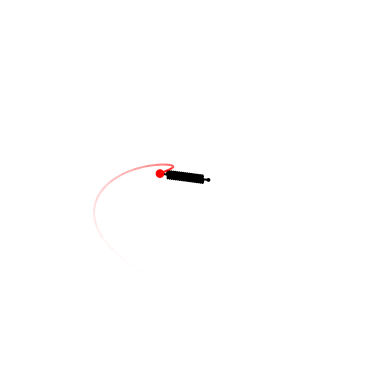

122 / 200


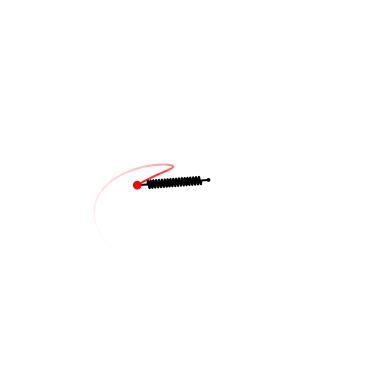

123 / 200


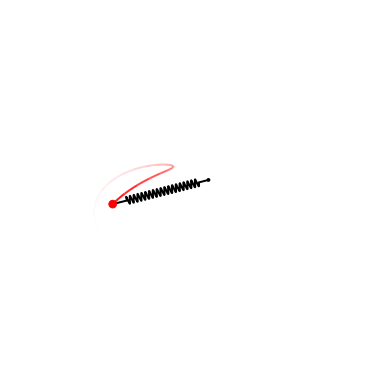

124 / 200


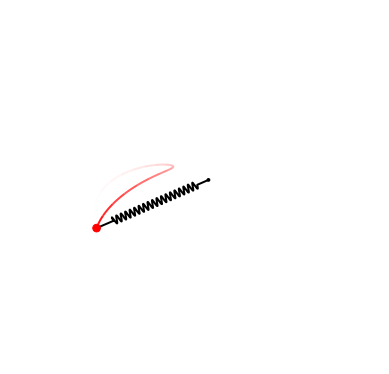

125 / 200


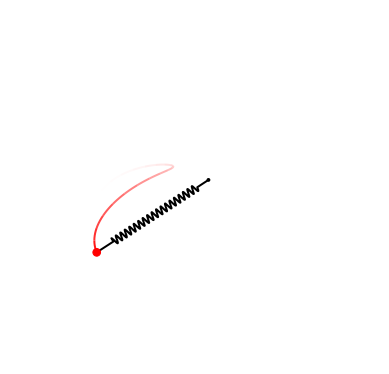

126 / 200


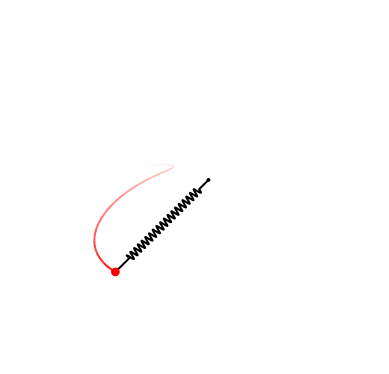

127 / 200


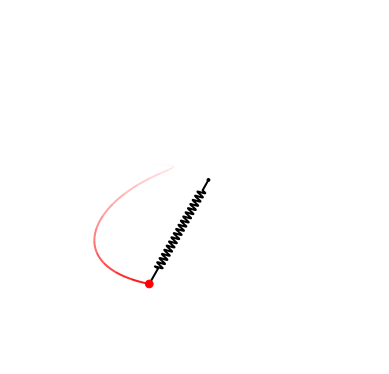

128 / 200


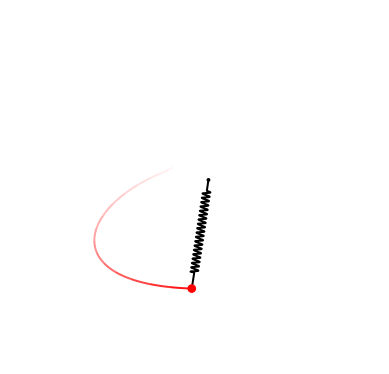

129 / 200


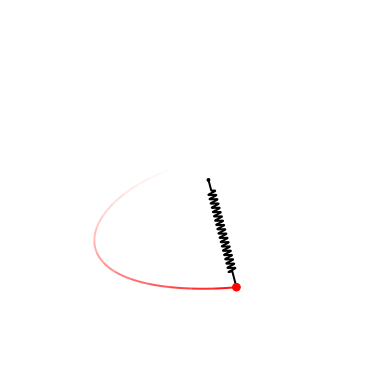

130 / 200


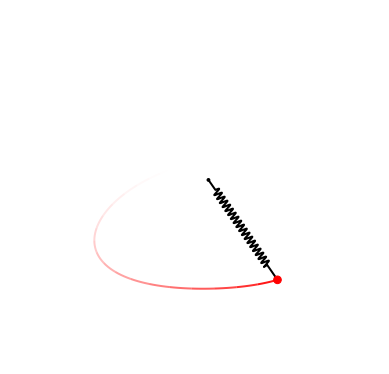

131 / 200


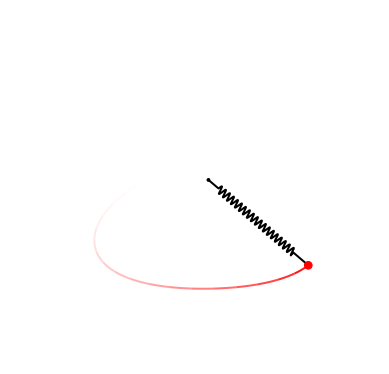

132 / 200


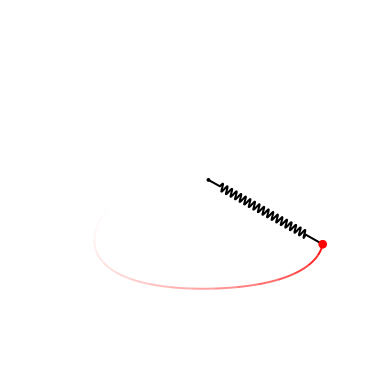

133 / 200


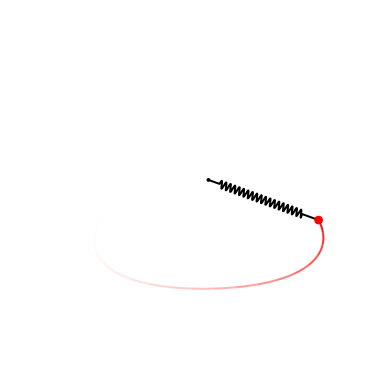

134 / 200


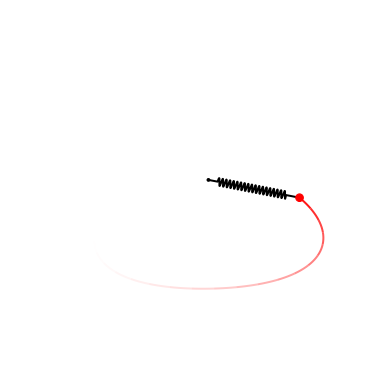

135 / 200


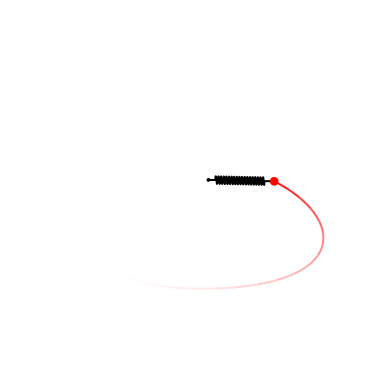

136 / 200


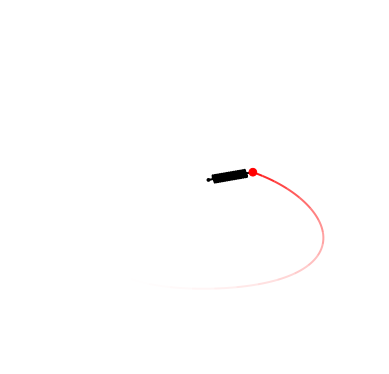

137 / 200


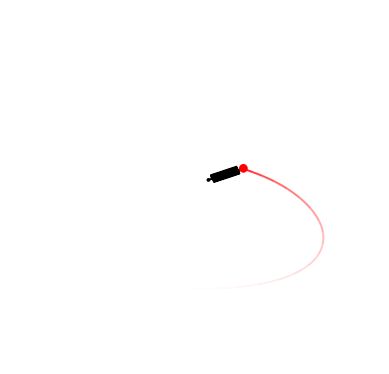

138 / 200


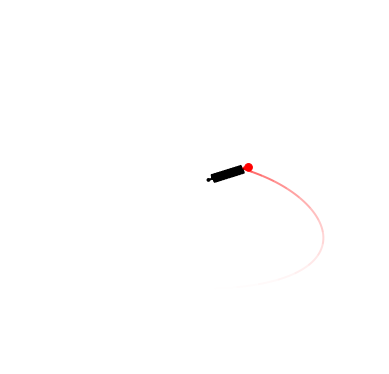

139 / 200


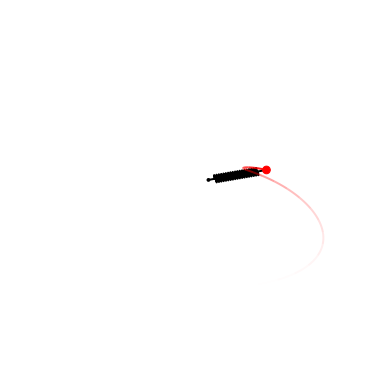

140 / 200


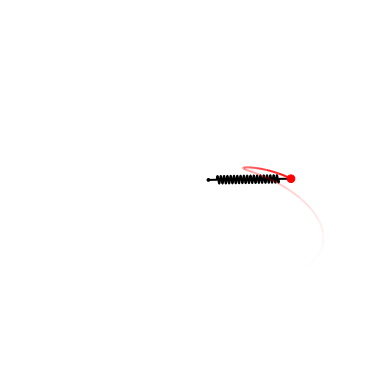

141 / 200


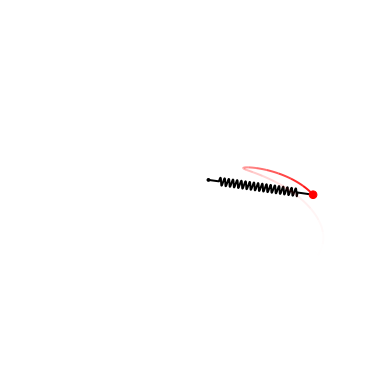

142 / 200


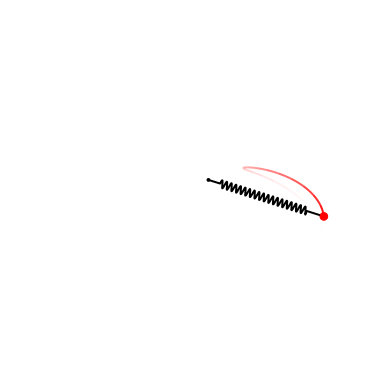

143 / 200


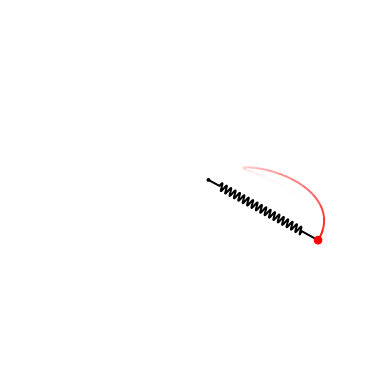

144 / 200


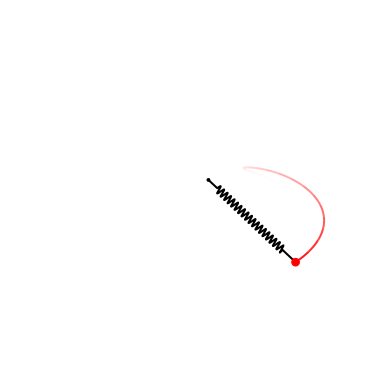

145 / 200


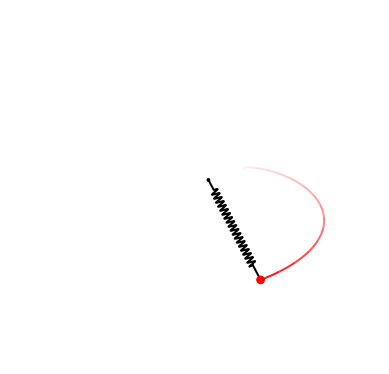

146 / 200


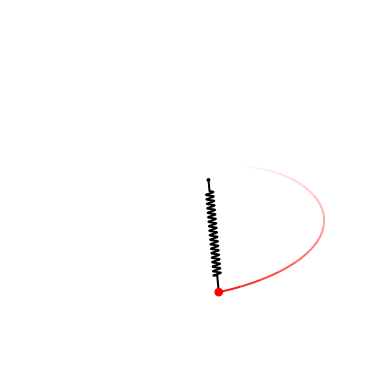

147 / 200


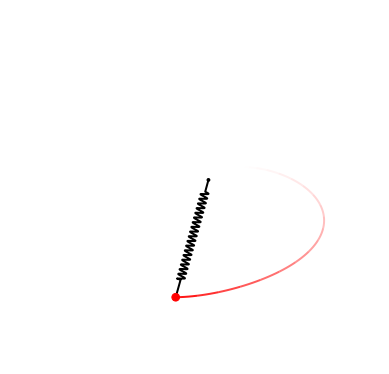

148 / 200


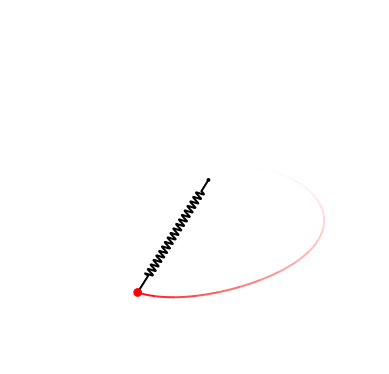

149 / 200


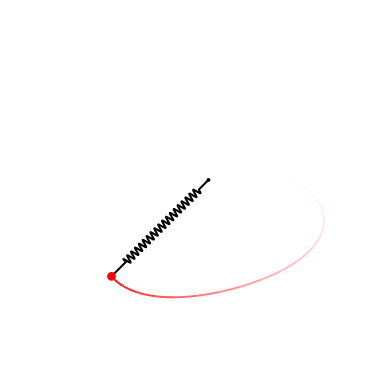

150 / 200


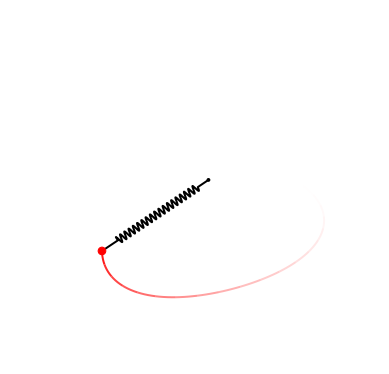

151 / 200


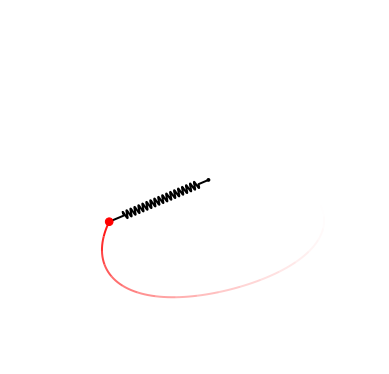

152 / 200


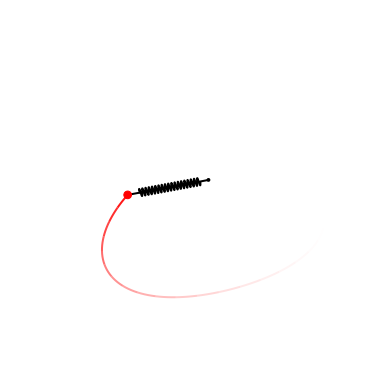

153 / 200


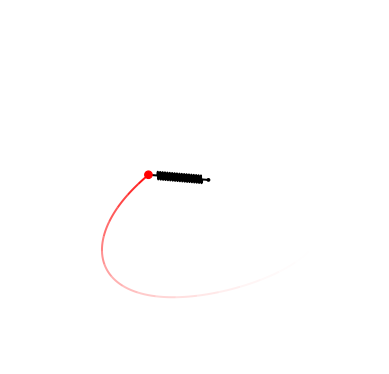

154 / 200


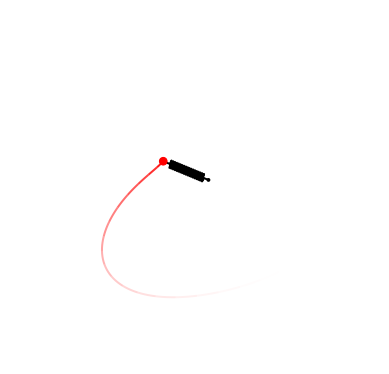

155 / 200


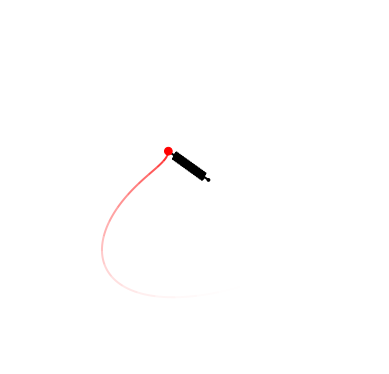

156 / 200


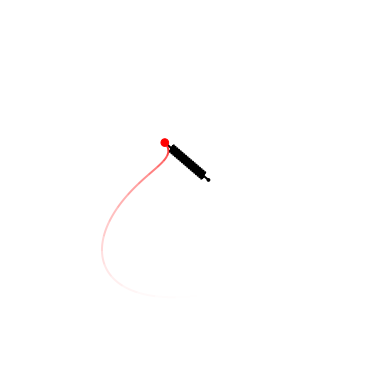

157 / 200


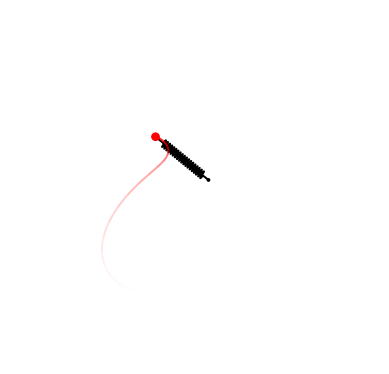

158 / 200


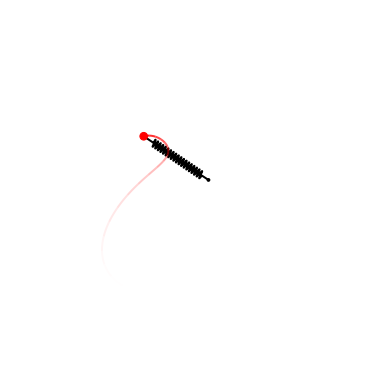

159 / 200


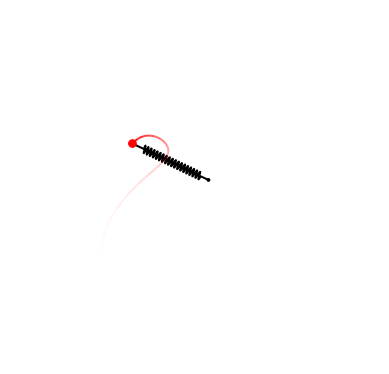

160 / 200


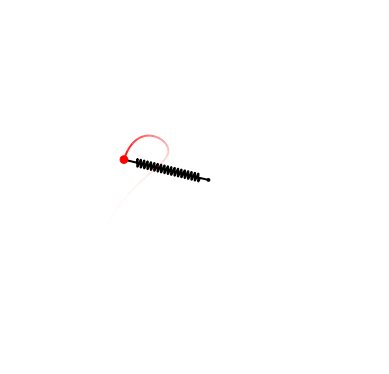

161 / 200


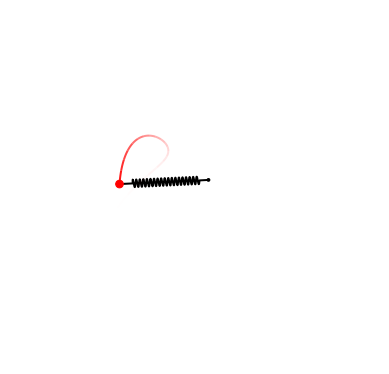

162 / 200


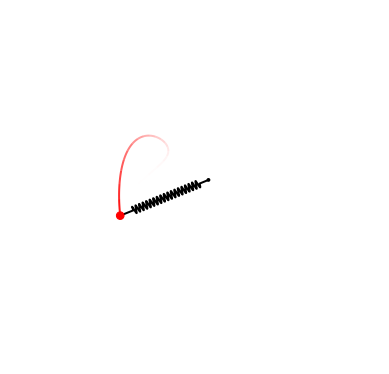

163 / 200


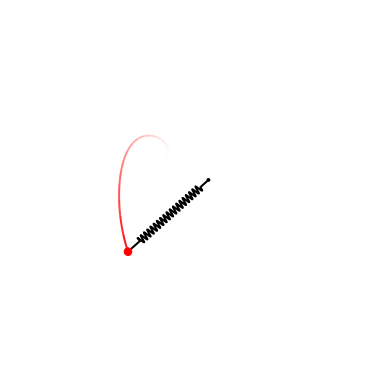

164 / 200


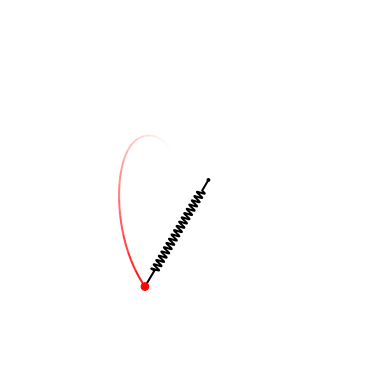

165 / 200


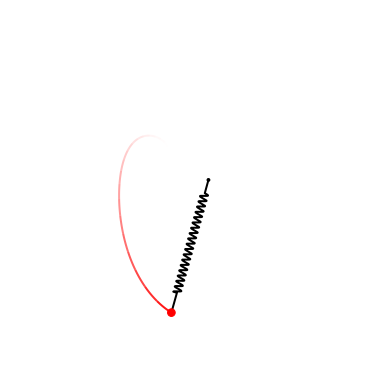

166 / 200


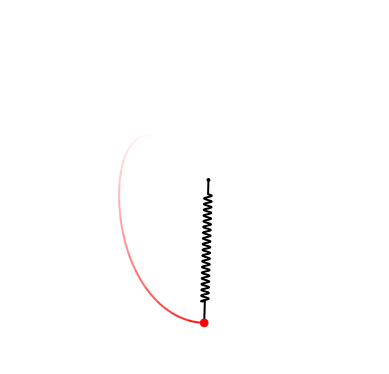

167 / 200


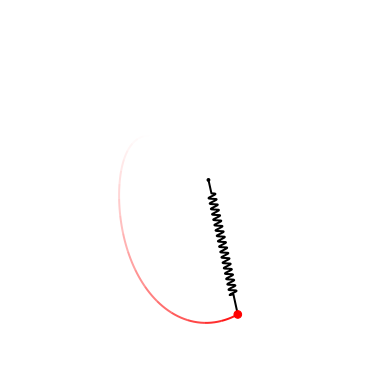

168 / 200


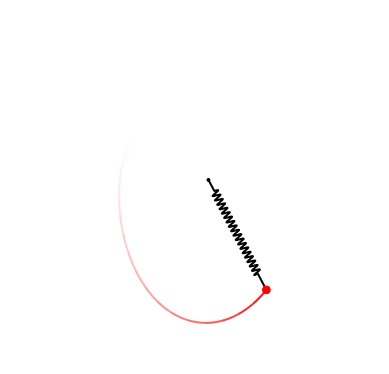

169 / 200


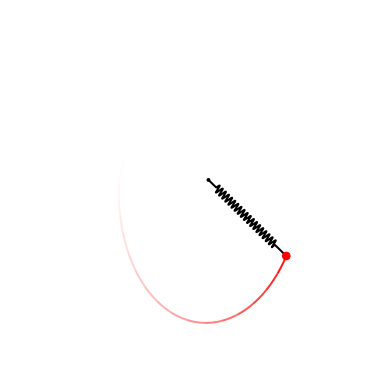

170 / 200


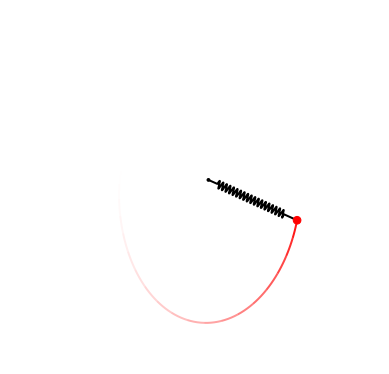

171 / 200


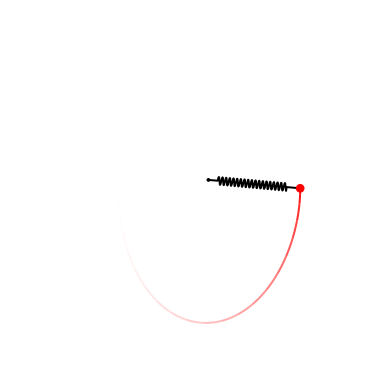

172 / 200


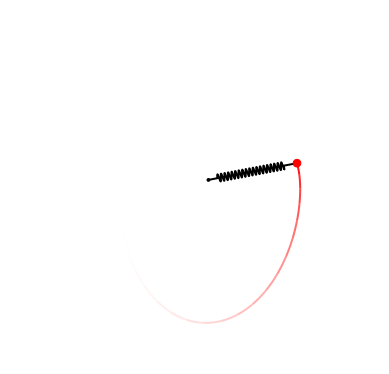

173 / 200


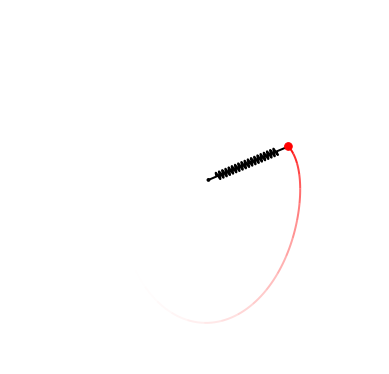

174 / 200


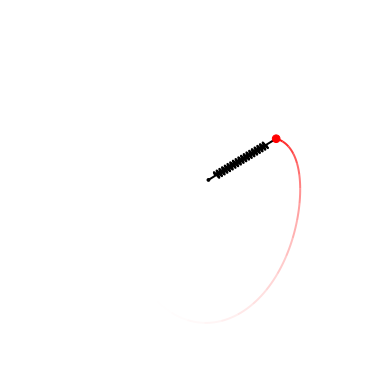

175 / 200


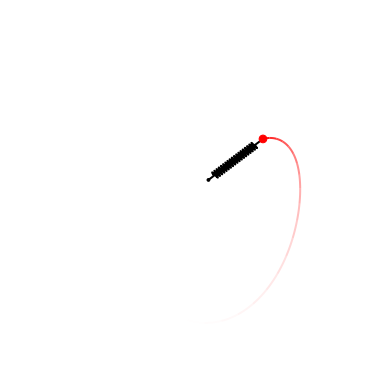

176 / 200


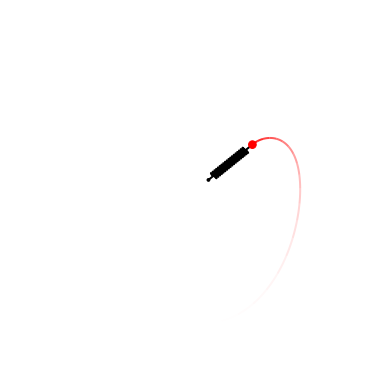

177 / 200


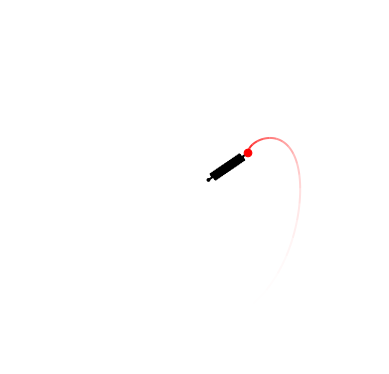

178 / 200


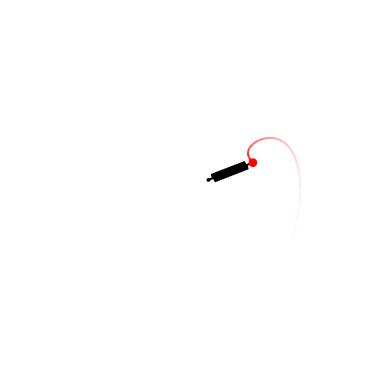

179 / 200


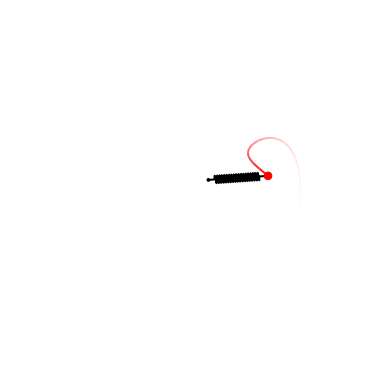

180 / 200


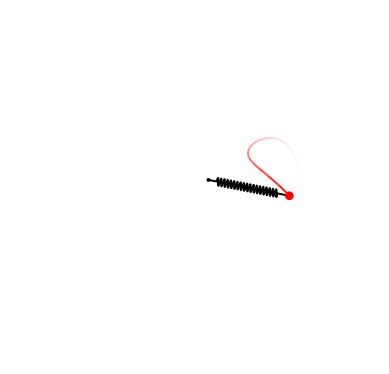

181 / 200


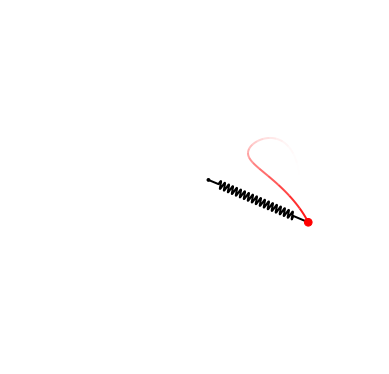

182 / 200


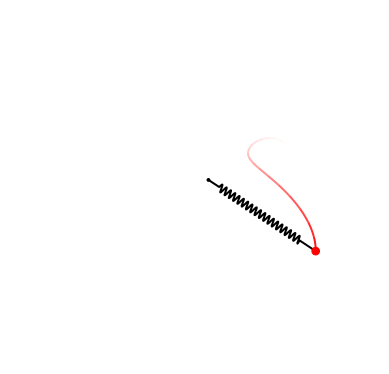

183 / 200


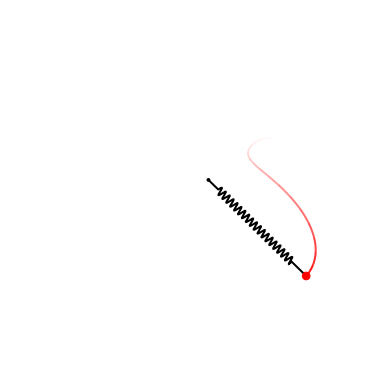

184 / 200


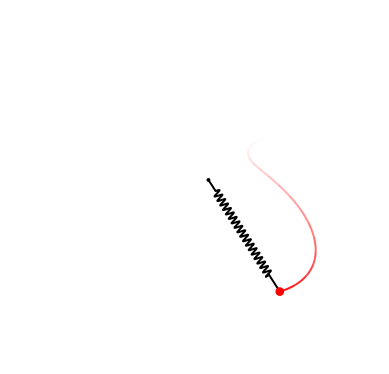

185 / 200


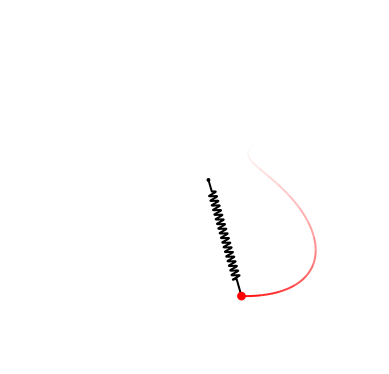

186 / 200


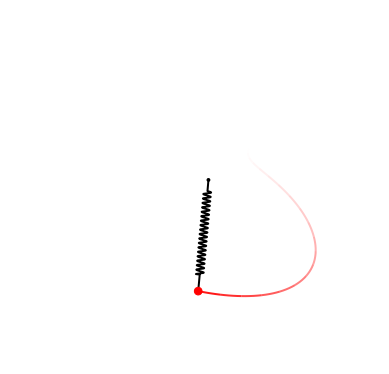

187 / 200


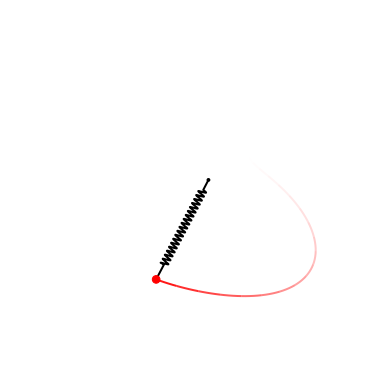

188 / 200


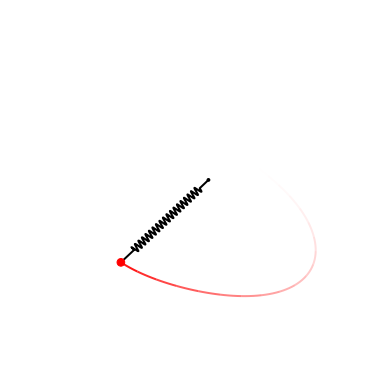

189 / 200


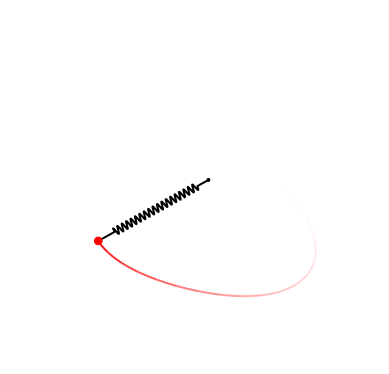

190 / 200


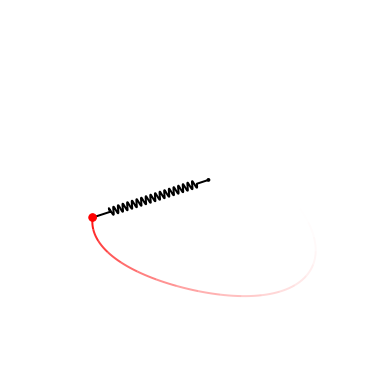

191 / 200


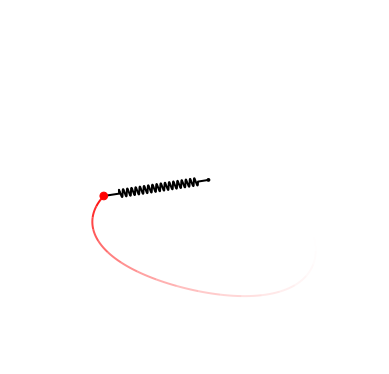

192 / 200


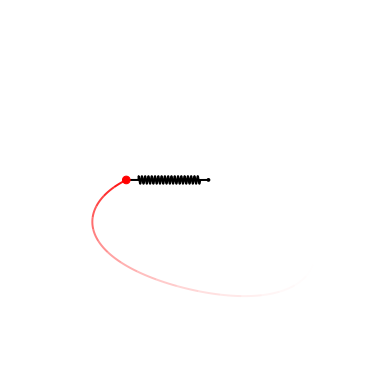

193 / 200


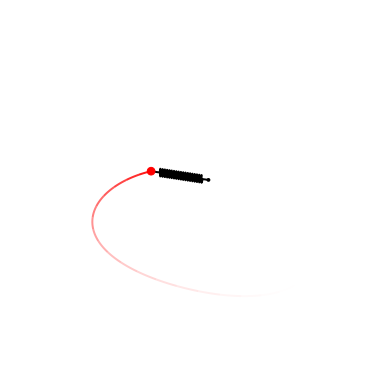

194 / 200


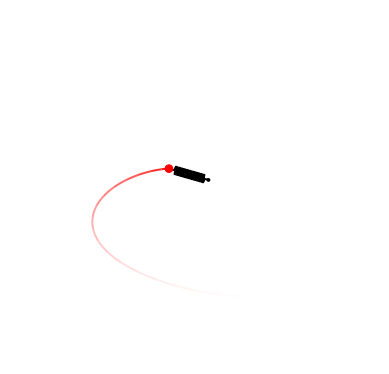

195 / 200


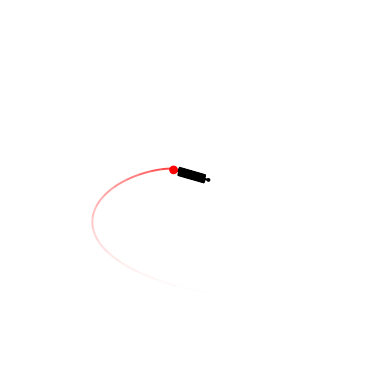

196 / 200


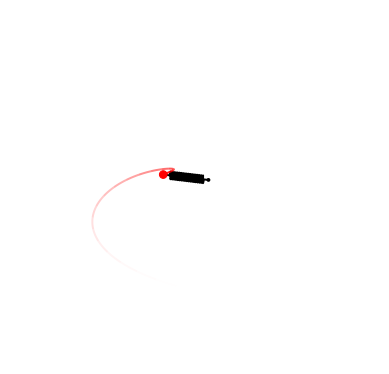

197 / 200


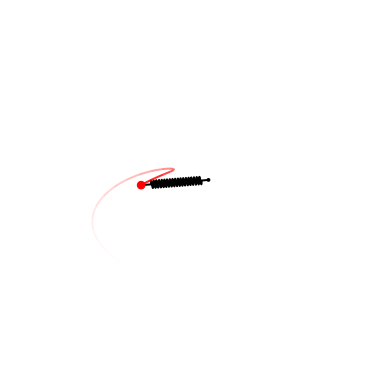

198 / 200


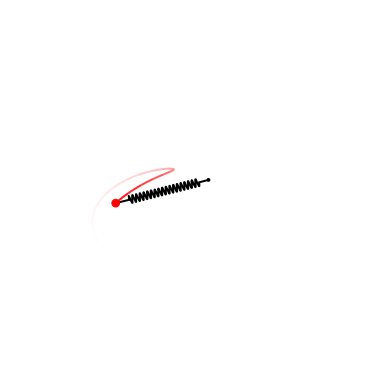

199 / 200


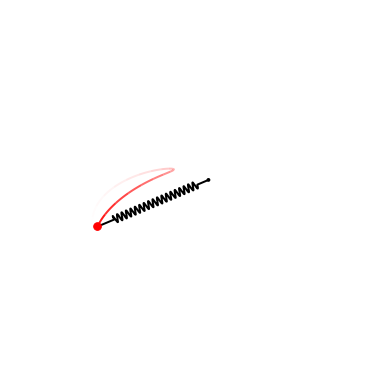

200 / 200


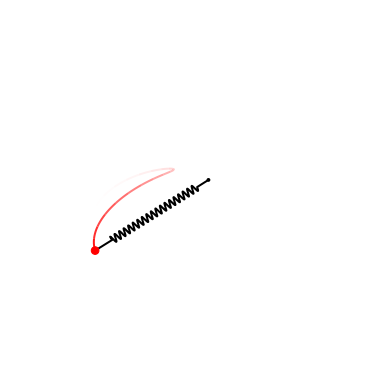

In [23]:
# Make an image every di time points, corresponding to a frame rate of fps
# frames per second.
# Frame rate, s-1
fps = 10
di = int(1/fps/dt)
images=[]
for i in range(0, t.size, di):
     print(i // di, '/', t.size // di)
     make_plot(i)

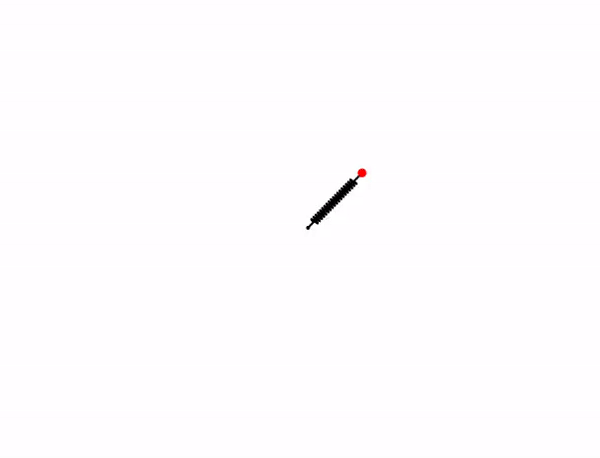

In [24]:
Image(filename='spring_pend.gif')

## Bibliography

https://stackoverflow.com/questions/33249327/pendulum-like-odeint-integration?noredirect=1&lq=1

https://math.stackexchange.com/questions/2026118/approximating-spring-cart-pendulum-system/2026235#2026235

https://codereview.stackexchange.com/questions/121138/fast-python-spring-network-solver

https://www.quora.com/How-do-I-make-a-simulation-of-a-pendulum-using-Python-or-write-the-differential-equation

https://stackoverflow.com/questions/41228209/making-gif-from-images-using-imageio-in-python

Also, thanks to Thomas Boudreaux and Nolan Roth for their help and expertise in the details.